In [1]:
import pandas as pd

df = pd.read_csv("MiniProject.csv")
df.head(20)

,visits,helpfulness,satisfaction,energy,standing,diet
0,1-2 times,Helpful,5,3,Sophomore,2
1,1-2 times,Neither Helpful nor Unhelpful,3,3,Junior,3
2,"0, I don't go to the SRC","N/A, never interacted with SRC staff",3,3,Junior,3
3,"0, I don't go to the SRC",Helpful,3,2,Senior,3
4,1-2 times,"N/A, never interacted with SRC staff",3,2,Sophomore,2
5,1-2 times,"N/A, never interacted with SRC staff",5,4,Senior,2
6,"0, I don't go to the SRC","N/A, never interacted with SRC staff",3,2,Senior,4
7,"0, I don't go to the SRC","N/A, never interacted with SRC staff",3,2,Senior,2
8,3-4 times,Helpful,5,4,Junior,3
9,"0, I don't go to the SRC",Neither Helpful nor Unhelpful,4,1,Junior,3


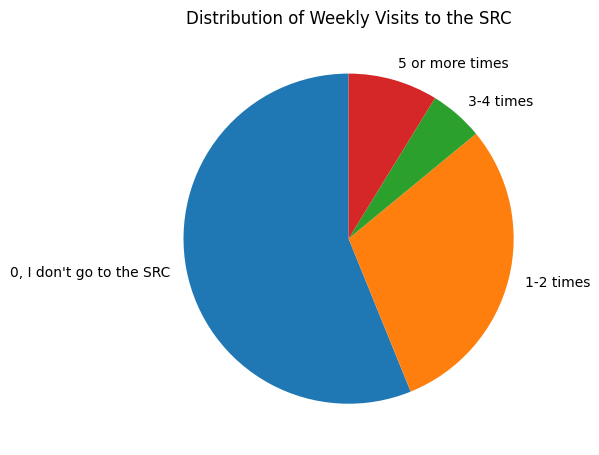

In [3]:
import matplotlib.pyplot as plt
visit_counts = df['visits'].value_counts().sort_index()

visit_counts.plot(kind='pie', autopct='%1.0f%%',  startangle=90,
                  figsize=(6, 6))
plt.title('Distribution of Weekly Visits to the SRC')
plt.ylabel('')
plt.tight_layout()
plt.show()

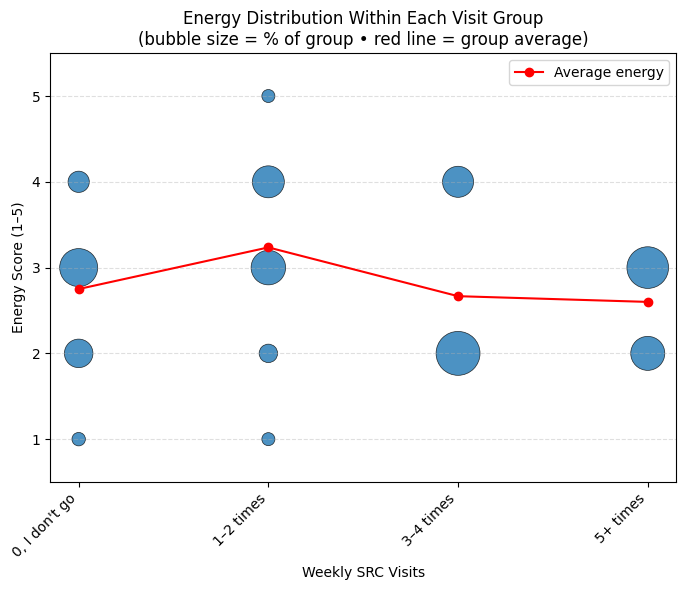

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

visit_groups = [
    "0, I don't go to the SRC",
    "1-2 times",
    "3-4 times",
    "5 or more times"
]
visit_code = {label: i for i, label in enumerate(visit_groups)}
df["visit_code"] = df["visits"].map(visit_code)


x_vals, y_vals, sizes = [], [], []
for label in visit_groups:
    group = df[df["visits"] == label]
    total = len(group)
    for energy in range(1, 6):
        count = (group["energy"] == energy).sum()
        pct   = count / total if total else 0         
        x_vals.append(visit_code[label])
        y_vals.append(energy)
        sizes.append(pct * 1500)                       

mean_energy = [df[df["visits"] == lbl]["energy"].mean() for lbl in visit_groups]


plt.figure(figsize=(7, 6))


plt.scatter(x_vals, y_vals, s=sizes, alpha=0.8, edgecolor="k", linewidth=0.5)


plt.plot(range(len(mean_energy)), mean_energy,
         color="red", marker="o",  label="Average energy")

plt.xticks(range(len(visit_groups)), ["0, I don't go", "1–2 times", "3–4 times", "5+ times"],
           rotation=45, ha="right")

plt.title("Energy Distribution Within Each Visit Group\n"
          "(bubble size = % of group • red line = group average)")
plt.xlabel("Weekly SRC Visits")
plt.ylabel("Energy Score (1–5)")
plt.ylim(0.5, 5.5)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()